# 2018-04-30 - Limite de reconnaissance de l'orientation des MC - Psychophysique
Petit notebook histoire de chercher un seuil de détection des $\theta$ chez l'Homme

In [3]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio


downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_theta = 1000
nbr_chunks = 50 

bw_values = np.pi*np.logspace(-7,0, N_theta, base=2)
bw_subsets = np.array_split(bw_values, nbr_chunks)

fig_width = 21
print('Btheta list : \n'+str( bw_values*180/np.pi))

theta_list = [0,np.pi/2, np.pi/4, 3*np.pi/4] #liste des angles theta

Btheta list : 
[  1.40625      1.41309661   1.41997656   1.42689      1.4338371
   1.44081802   1.44783293   1.454882     1.46196538   1.46908326
   1.47623578   1.48342313   1.49064548   1.49790298   1.50519583
   1.51252417   1.5198882    1.52728808   1.53472399   1.54219611
   1.5497046    1.55724964   1.56483143   1.57245012   1.58010591
   1.58779898   1.59552949   1.60329765   1.61110363   1.61894761
   1.62682978   1.63475033   1.64270944   1.6507073    1.6587441
   1.66682003   1.67493528   1.68309004   1.6912845    1.69951886
   1.70779331   1.71610804   1.72446326   1.73285915   1.74129593
   1.74977378   1.7582929    1.7668535    1.77545578   1.78409995
   1.7927862    1.80151474   1.81028577   1.81909951   1.82795617
   1.83685594   1.84579904   1.85478568   1.86381608   1.87289044
   1.88200899   1.89117193   1.90037948   1.90963186   1.91892928
   1.92827197   1.93766015   1.94709404   1.95657386   1.96609983
   1.97567219   1.98529114   1.99495693   2.00466978   2.014429

Test started
If you cannot guess, give your best answer


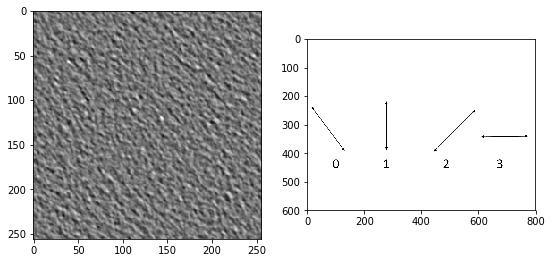

Trial no. 1 : 0


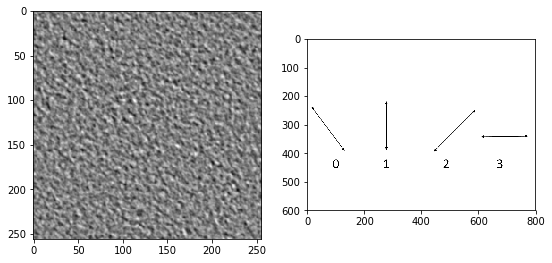

Trial no. 2 : 0


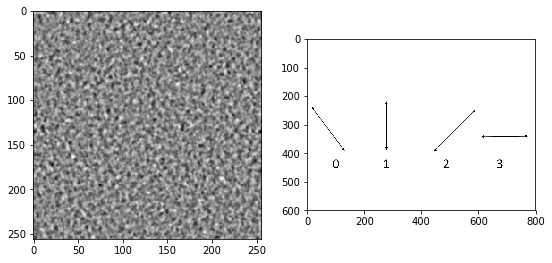

Trial no. 3 : 3


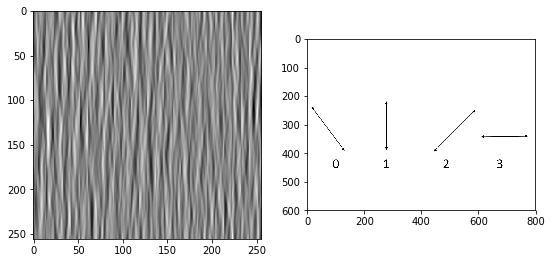

Trial no. 4 : 1
Finished test in  1.015 minutes 


In [4]:
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image   
import os
import time
start_time = time.time()
print("Test started")


plt.rcParams["figure.figsize"] = [9, 9]
test_length = 5
trial_number = 1

ans_list = []
corr_list = []

print("If you cannot guess, give your best answer")
while trial_number < test_length :
    chunk_index = random.randrange(len(bw_subsets)) #chunk randomly picked
    
    chunk_orientation = bw_subsets[chunk_index] #chunk's list of value
    chunk_orientation = (chunk_orientation[1] + chunk_orientation[-1]) / 2 #chunk's mean
    chunk_orientation = chunk_orientation*180/np.pi #and back to angles
    
    orientation_folders = os.listdir('clouds_boundary/chunk%s' % chunk_index)
    orientation_index = random.randrange(len(orientation_folders)) #orientation index randomly picked
    
    image_folder = os.listdir('clouds_boundary/chunk%s/%s'% (chunk_index,
                                                    orientation_folders[orientation_index]) )
    image_index = random.randrange(len(image_folder))
   
    img = Image.open(str('clouds_boundary/chunk%s/%s/%s'% (chunk_index,
                                                    orientation_folders[orientation_index],
                                                      image_folder[image_index])))
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(img.convert('RGBA'))
    f.add_subplot(1,2, 2)
    plt.imshow(Image.open('template.png'))
    plt.show()

    ans = input("Trial no. %s : " % trial_number)
    
    ans_list.append((int(ans), chunk_orientation)) #answer and b_theta value
    corr_list.append(float(orientation_folders[orientation_index]))
    
    trial_number +=1

#print(ans_list)
#print(corr_list)

print("Finished test in  %.3f minutes " % ((time.time() - start_time)/60))

Maintenant on compare les réponses correctes aux réponses du sujet, sortant les datas sous la forme B_theta ; correct/faux

In [5]:
orientation_dict = {0 : 2.356194490192345,
                   1 :  1.5707963267948966,
                    2 : 0.7853981633974483,
                   3 : 0}
orientation_dict = {val:key for (key, val) in orientation_dict.items()} #oops let's swap

out_list = []

for t in range(len(ans_list)) :
    #print(t)
    #print(ans_list[t][0]) #answer
    #print(ans_list[t][1]) #b_theta angle
    #print(orientation_dict[ans_list[t][0]]) #true angle
    #print(corr_list[t]) #true correct angle
    
    if ans_list[t][0] == orientation_dict[corr_list[t]] : #correct answer, code 1
        out_list.append((ans_list[t][1], 1))
    else :
        out_list.append((ans_list[t][1], 0))

print(out_list)

[(36.45198965689809, 1), (48.784335718319305, 1), (96.29086679203641, 0), (6.344045576538483, 1)]


Et on plot :


[(6.344045576538483, 1), (36.45198965689809, 1), (48.784335718319305, 1), (96.29086679203641, 0)]


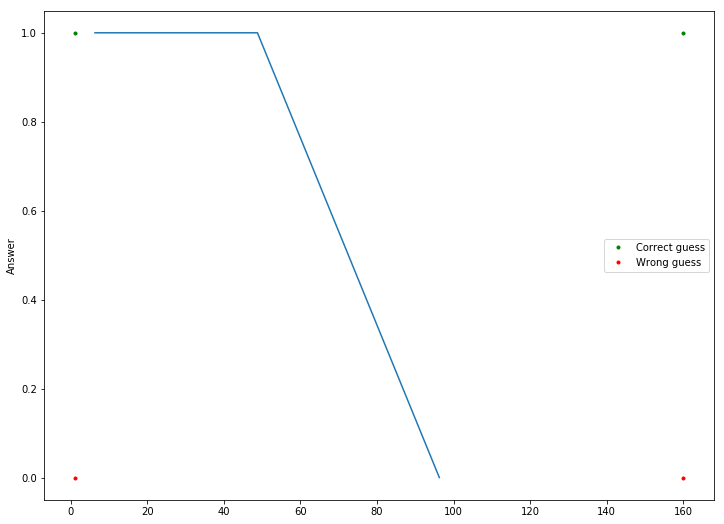

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 9]

plt.xlabel("B θ")
plt.ylabel("Answer")


out_list.sort(key=lambda x: x[0])
print(out_list)
plt.plot(*zip(*out_list))
plt.plot([1,160],[1,1], '.', color = 'green', label = 'Correct guess')
plt.plot([1,160],[0,0], '.', color = 'red', label = 'Wrong guess')

plt.xlabel('')
plt.legend()
plt.show()